<a href="https://colab.research.google.com/github/viniciuskurt/ProjetoDio_Analisando_DadosChamadas911/blob/main/Projeto_DIO_An%C3%A1lise_de_dados_com_Python_e_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 #Projeto: Analisando Dados de Chamadas de Emergência 911 


O seguinte projeto tem o objetivo de analisar os dados de chamadas telefônicas realizadas para o número de emergência 911 do Condado de Montgomery, localizado no estado americano de Maryland.

Este Dataset foi retirado do site Kaggle.com .

In [2]:
#importando bibliotecas que serão utilizadas no projeto
import numpy as np
import pandas as pd

#bibliotecas de visualização
import seaborn as sns
import matplotlib.pyplot as plt

#configuração para visualizar plots diretamente abaixo da célula de código. 
%matplotlib inline

In [3]:
#importando dataset 911.csv do Google Drive
df = pd.read_csv("/content/drive/MyDrive/Datasets/911.csv")

In [4]:
#confirmando carregamento do dataset
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [5]:
#traduzindo/alterando nome das colunas para Português
df = df.rename(columns={'lat':'Latitude',
                  'lng':'Longitude',
                   'desc':'Descrição',
                   'zip':'CEP',
                   'title':'Título',
                   'timeStamp':'Data',
                   'twp':'Município',
                   'addr':'Endereço',
                   'e':'Categoria'
                   })

In [6]:
#verificando cabeçalho do Dataset
df.head()

,Latitude,Longitude,Descrição,CEP,Título,Data,Município,Endereço,Categoria
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [23]:
#analisando informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   99492 non-null  float64
 1   Longitude  99492 non-null  float64
 2   Descrição  99492 non-null  object 
 3   CEP        86637 non-null  float64
 4   Título     99492 non-null  object 
 5   Data       99492 non-null  object 
 6   Município  99449 non-null  object 
 7   Endereço   98973 non-null  object 
 8   Categoria  99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [8]:
#analisando total de linhas e colunas
df.shape

(99492, 9)

In [9]:
#verificando nome das colunas
df.columns

Index(['Latitude', 'Longitude', 'Descrição', 'CEP', 'Título', 'Data',
       'Município', 'Endereço', 'Categoria'],
      dtype='object')

In [10]:
#analisando dados nulos
df.isnull().sum()

Latitude         0
Longitude        0
Descrição        0
CEP          12855
Título           0
Data             0
Município       43
Endereço       519
Categoria        0
dtype: int64

### Análise:

Verificamos inicialmente que o Dataset possui 99.492 linhas, contendo 9 colunas de dados com as informações sobre chamadas de Emergência. 

Total de chamadas para o número de Emergência: 99.492 

Os tipos de dados utilizados no Dataset são: float64(3), int64(1), object(5) e ocupam um total de aproximadamente 6.8 mb.

Importante notar que o Dataset possui dados nulos nas Colunas CEP, Município e Endereço. 

Obs: (Para esta análise, decidi não remover/tratar as linhas com valores nulos.)


In [11]:
#analisando 5 primeiras linhas
df.head()

,Latitude,Longitude,Descrição,CEP,Título,Data,Município,Endereço,Categoria
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [12]:
#analisando 5 últimas linhas
df.tail()

,Latitude,Longitude,Descrição,CEP,Título,Data,Município,Endereço,Categoria
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1


In [13]:
#analisando tipo de dados das colunas
df.dtypes

Latitude     float64
Longitude    float64
Descrição     object
CEP          float64
Título        object
Data          object
Município     object
Endereço      object
Categoria      int64
dtype: object

In [22]:
#verificando informações Estatísticas do dataset
df.describe()

,Latitude,Longitude,CEP,Categoria
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [39]:
#analisando top 5 datas das chamadas 911
df['Data'].value_counts().head()


2015-12-10 17:40:01    8
2016-04-21 17:57:01    7
2015-12-23 14:12:01    7
2016-05-23 14:22:01    6
2016-07-31 12:42:01    6
Name: Data, dtype: int64

In [31]:
#analisando top 5 municípios das chamadas
df['Município'].value_counts().head()


LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: Município, dtype: int64

### Análise:

Podemos observar que o município de "Lower Merion" possuí um aumento significativo no total de número de chamadas se comparado aos outros 4 primeiros Municípios.

In [16]:
#analisando de Títulos das chamadas
df['Título'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [17]:
#analisando total de tipos de Títulos
df['Título'].nunique()

110

In [112]:
#analisando top 10 motívos das chamadas para o 911
dftitulo = df['Título'].value_counts().head(10)
dftitulo

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
EMS: FALL VICTIM                4863
EMS: VEHICLE ACCIDENT           3935
Traffic: ROAD OBSTRUCTION -     3144
EMS: SUBJECT IN PAIN            2687
EMS: HEAD INJURY                2631
Name: Título, dtype: int64

### Análise:

Com base nos dados, verificamos que as chamadas de "VEHICLE ACCIDENT" (acidentes de veículos) são as mais recebidas pelo número de Emergência 911.

Devido a esses números, podemos sugerir as autoridades do Condado de Montgomery um maior investimento no treinamento de equipes e equipamentos utilizados para esse tipo de resgate. Uma possível revisão nas políticas de trânsito e maior fiscalização podem vir a colaborar para a diminuição desses números.

In [117]:
#analisando top 5 endereços de chamadas
df['Endereço'].value_counts().head()

SHANNONDELL DR & SHANNONDELL BLVD    938
MAIN ST & OLD SUMNEYTOWN PIKE        390
THE FAIRWAY  & RYDAL RD              260
GULPH RD & KIRK AVE                  235
EVERGREEN RD & W LIGHTCAP RD         232
Name: Endereço, dtype: int64

### Análise:

Há uma grande concentração de chamadas realizadas no endereço "SHANNONDELL DR & SHANNONDELL BLVD". 

Pode-se sugerir as autoridades um aumento na fiscalização e policiamento neste endereço afim de tentar diminuir chamadas de Emergência neste local.

In [42]:
#convertendo a coluna Data de string para Datetime
df['Data'] = pd.to_datetime(df['Data'])

In [43]:
#verificando se conversão ocorreu corretamente
df['Data'].iloc[3]

Timestamp('2015-12-10 17:40:01')

In [44]:
#criando novas colunas para refinar a análise de dados
df['Hora'] = df['Data'].apply(lambda x: x.hour)
df['Mês'] = df['Data'].apply(lambda x: x.month)
df['Dia da Semana'] = df['Data'].apply(lambda x: x.dayofweek)

In [45]:
#contando total de ligações em mensal
df['Mês'].value_counts()

1     13205
7     12137
6     11786
2     11467
5     11423
4     11326
3     11101
8      9078
12     7969
Name: Mês, dtype: int64

### Análise:

Observamos que os meses 1 (janeiro) e 7 (julho) são os que possuem maior número de chamadas. Também é possível observar uma diminuição a partir do mês 8 (agosto).

Analisamos também quem em nosso Dataset faltam os dados dos meses 9, 10 e 11.

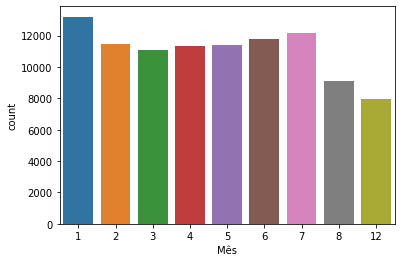

In [65]:
#gráfico de chamadas por mês
sns.countplot(x='Mês', data=df)

In [66]:
#total de ligações semanas
df['Dia da Semana'].value_counts()

1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: Dia da Semana, dtype: int64

In [68]:
#criando dicionário para nomes de dias da semana
diasemana = {0:"Domingo",
             1:"Segunda",
             2:"Terça",
             3:"Quarta",
             4:"Quinta",
             5:"Sexta",
             6:"Sábado"
             }

In [69]:
#aplicando dicionário
df['Dia da Semana'] = df['Dia da Semana'].map(diasemana)

In [70]:
df['Dia da Semana'].value_counts()

Segunda    15150
Terça      14879
Quinta     14833
Domingo    14680
Quarta     14478
Sexta      13336
Sábado     12136
Name: Dia da Semana, dtype: int64

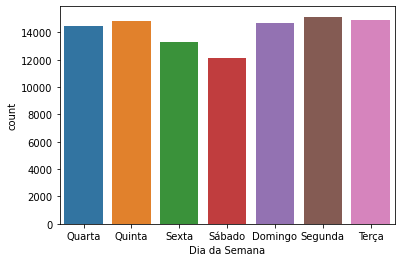

In [71]:
sns.countplot(x='Dia da Semana', data=df)

In [87]:
#analisando informações através de agrupamento da coluna mês 
agrupaMes = df.groupby('Mês').count()
agrupaMes

,Latitude,Longitude,Descrição,CEP,Título,Data,Município,Endereço,Categoria,Hora,Dia da Semana,colunaData
Mês,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


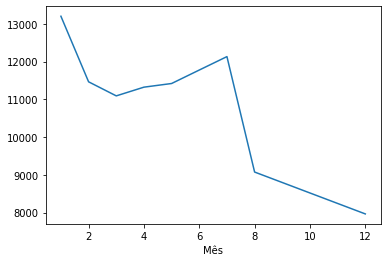

In [73]:
#criando gráfico simples de indicação de chamadas por mês
agrupaMes['Município'].plot()

### Análise:

Através do gráfico observamos que o aumento das ligações de Emergência ocorrem nos meses 1 (janeiro) e 7 (julho). Com base nesse gráfico, podemos concluir que as chamadas para a Emergência tendem a aumentar significativamente no período de férias. Podemos sugerir aos tomadores de decisão do Condado que no período de férias sejam realizados patrulhamentos das autoridades mais frequentes na tentativa de diminuição de chamadas para os números de Emergência.